In [3]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.linear_model import LinearRegression


import numpy as np
from scipy import linalg
from sklearn.datasets import make_sparse_spd_matrix
from sklearn.covariance import GraphicalLassoCV, graphical_lasso, GraphicalLasso
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.utils.extmath import fast_logdet

In [11]:
# #############################################################################
# Generate the data
# Generate the data
n_samples = 500
n_features =30

prng = np.random.RandomState(1)
prec = make_sparse_spd_matrix(n_features, alpha=.98,
                              smallest_coef=.4,
                              largest_coef=.7,
                              random_state=prng)


#prec = np.identity(n_features)
cov = linalg.inv(prec)
d = np.sqrt(np.diag(cov))
cov /= d
cov /= d[:, np.newaxis]
prec *= d
prec *= d[:, np.newaxis]
X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
random_noise = np.random.normal(0, 1, n_samples*n_features).reshape(n_samples,n_features)

X = X + random_noise
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [12]:
#Empirical 
emp_cov = np.cov(X.T, bias=1)
emp_prec = linalg.inv(emp_cov)

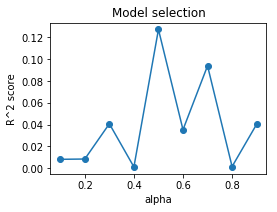

In [15]:

#BIC for different alpha 
alpha_array = np.arange(0.1, 1, 0.1) # model.cv_alphas_ #  

R_score = []
mean_connectivity = []


for alpha in alpha_array:
    
#     g = graphical_lasso(emp_cov, alpha, return_costs=False)
#     glasso_cov = g[0]
#     G = nx.from_numpy_matrix(glasso_cov)
    
    #G = nx.barabasi_albert_graph(n=500, m=5)
    G_rand = nx.gnp_random_graph(500, 0.05)
    G=G_rand
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())


    X = np.log(deg).reshape(-1, 1)
    y = np.log(cnt).reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    this_score = reg.score(X, y)
    R_score.append(this_score)

   # mean_connectivity.append(nx.average_node_connectivity(G, flow_func=None))
    

  
        
# #pick the min alpha where R^2 > 0.8/9
# alpha_bic = alpha_array[np.argmin(bic)]
# #glasso with optimum alpha 
# g_bic = graphical_lasso(emp_cov, alpha=alpha_bic)
# bic_prec = g_bic[1]
# bic_cov = g_bic[0]


# plot the model selection metric
plt.figure(figsize=(4, 3))
plt.axes([.2, .15, .75, .7])
plt.plot(alpha_array, R_score, 'o-')
#plt.axvline(alpha_bic, color='.5')
plt.title('Model selection')
plt.ylabel('R^2 score')
plt.xlabel('alpha')

plt.show()



In [ ]:

nx.average_node_connectivity(G, flow_func=None)

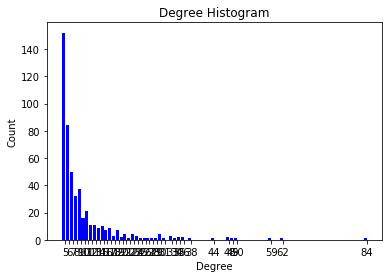

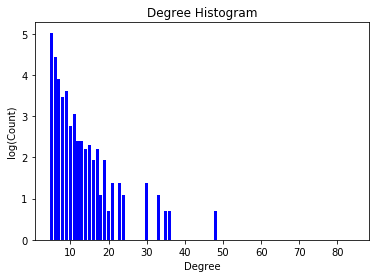

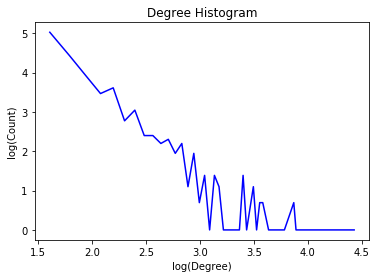

In [35]:

G = G_ba
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

plt.bar(deg, np.log(cnt), width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("log(Count)")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

plt.plot(np.log(deg), np.log(cnt), color='b')

plt.title("Degree Histogram")
plt.ylabel("log(Count)")
plt.xlabel("log(Degree)")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()


In [36]:
X = np.log(deg).reshape(-1, 1)
# y = 1 * x_0 + 2 * x_1 + 3
y = np.log(cnt).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8196549419077943

In [ ]:
nx.average_node_connectivity(G_ba, flow_func=None)